In [1]:
#Load the Data
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# print("Columns in the training dataset: ", train_data.columns)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [3]:
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
# Check which Column have how many missing values
missing = train_data.isna().sum()
missing[missing>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 1. Getting the data ready (Preprocessing)

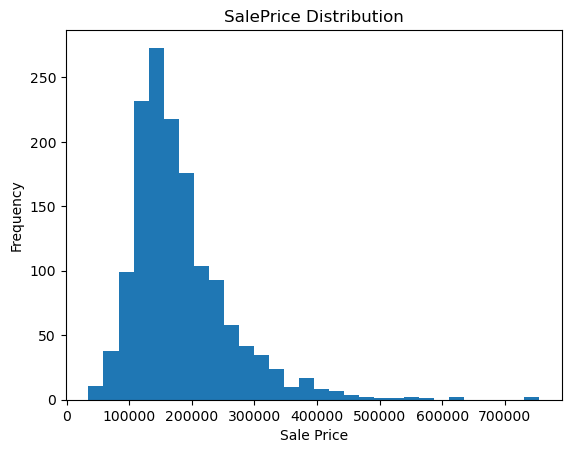

In [5]:
# To check column is Skewed or not visually.
import matplotlib.pyplot as plt

plt.hist(train_data["SalePrice"], bins=30);
plt.title("SalePrice Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Frequency");

2.1 Skewed to Normal distribution of SalePrice column. 

In [6]:
import numpy as np
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

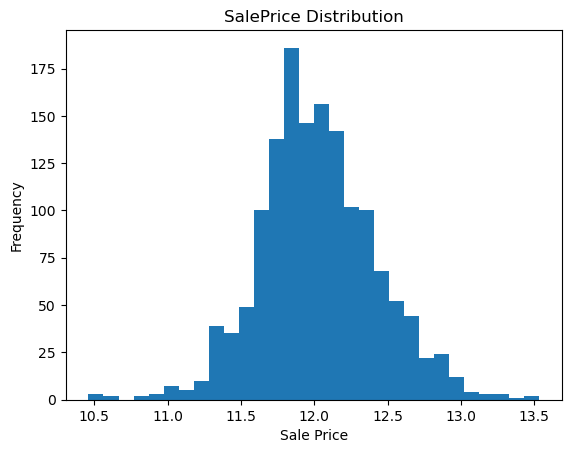

In [7]:
plt.hist(train_data["SalePrice"], bins=30);
plt.title("SalePrice Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Frequency");

In [8]:
# Training Data (We have test.csv for testing. But before final testing we can do validation testing)
from sklearn.model_selection import train_test_split

x = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"]

np.random.seed(42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [9]:
x_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [10]:
x_val.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [106]:
# y_train[:20]

In [11]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [12]:
len(x_train), len(x_val)

(1168, 292)

2.2 Handle Missing values

In [13]:
# Check which int64, float64 and object datatype Column have how many missing values
missing = x_train.isna().sum()
missing[missing>0]

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [14]:
print(x_train.select_dtypes(include=["int64", "float64"]).columns)

print(x_train.select_dtypes(include=["object"]).columns) 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', '

Due to LotFrontage, MasVnrArea, GarageYrBlt columns are of int64 or float64 type, we can replace null values with mean of that column

In [15]:
# Replacement for training dataset
x_train.fillna({"LotFrontage":train_data["LotFrontage"].mean()}, inplace=True)
x_train.fillna({"MasVnrArea": train_data["MasVnrArea"].mean()}, inplace=True)
x_train.fillna({"GarageYrBlt": train_data["GarageYrBlt"].mean()}, inplace=True)

In [16]:
# Check which object Column have how many missing values
missing = x_train.isna().sum()
missing[missing>0]

Alley           1094
MasVnrType       683
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [17]:
# Replacement for validation set
missing = x_val.isna().sum()
missing[missing>0]

LotFrontage      42
Alley           275
MasVnrType      189
MasVnrArea        2
BsmtQual          9
BsmtCond          9
BsmtExposure     10
BsmtFinType1      9
BsmtFinType2     10
FireplaceQu     143
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          291
Fence           244
MiscFeature     284
dtype: int64

In [18]:
x_val.fillna({"LotFrontage":train_data["LotFrontage"].mean()}, inplace=True)
x_val.fillna({"MasVnrArea": train_data["MasVnrArea"].mean()}, inplace=True)
x_val.fillna({"GarageYrBlt": train_data["GarageYrBlt"].mean()}, inplace=True)

In [19]:
missing = x_val.isna().sum()
missing[missing>0]

Alley           275
MasVnrType      189
BsmtQual          9
BsmtCond          9
BsmtExposure     10
BsmtFinType1      9
BsmtFinType2     10
FireplaceQu     143
GarageType       17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          291
Fence           244
MiscFeature     284
dtype: int64

# Replace categorical columns

In [20]:
# Check Correlation of feature column with target column
# Note: 1. Allay have large number of NaN values so we are going to drop that column wthout checking correlation.
#       2. We Check correlation with only those columns who have large amount of missing value, so we can decide whether to drop or not.

dummpy_data = train_data

print("MasVnrType: ", dummpy_data["MasVnrType"].unique())
dummpy_data["MasVnrType_encoded"] = dummpy_data["MasVnrType"].map({"BrkFace":1, "Stone":2, "BrkCmn":3})
print(dummpy_data["MasVnrType_encoded"].corr(dummpy_data["SalePrice"]))


print("BsmtQual: ", dummpy_data["BsmtQual"].unique())
dummpy_data["BsmtQual_encoded"] = dummpy_data["BsmtQual"].map({"Gd":1, "TA":2, "Ex":3, "Fa":4})
print(dummpy_data["BsmtQual_encoded"].corr(dummpy_data["SalePrice"]))


print("FireplaceQu: ", dummpy_data["FireplaceQu"].unique())
dummpy_data["FireplaceQu_encoded"] = dummpy_data["FireplaceQu"].map({"TA":1, "Gd":2, "Fa":3, "Ex":4, "Po":5})
print(dummpy_data["FireplaceQu_encoded"].corr(dummpy_data["SalePrice"]))


print("PoolQC: ", dummpy_data["PoolQC"].unique())
dummpy_data["PoolQC_encoded"] = dummpy_data["PoolQC"].map({"Ex":1, "Fa":2, "Gd":3})
print(dummpy_data["PoolQC_encoded"].corr(dummpy_data["SalePrice"]))


print("Fence: ", dummpy_data["Fence"].unique())
dummpy_data["Fence_encoded"] = dummpy_data["Fence"].map({"MnPrv":1, "GdWo":2, "GdPrv":3, "MnWw":4})
print(dummpy_data["Fence_encoded"].corr(dummpy_data["SalePrice"]))


print("MiscFeature: ", dummpy_data["MiscFeature"].unique())
dummpy_data["MiscFeature_encode"] = dummpy_data["MiscFeature"].map({"Shed":1, "Gar2":2, "Othr":3, "TenC":4})
print(dummpy_data["MiscFeature_encode"].corr(dummpy_data["SalePrice"]))

MasVnrType:  ['BrkFace' nan 'Stone' 'BrkCmn']
0.15056552160975423
BsmtQual:  ['Gd' 'TA' 'Ex' nan 'Fa']
-0.10981800047127273
FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
-0.01770374987240539
PoolQC:  [nan 'Ex' 'Fa' 'Gd']
-0.620295057117779
Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
0.15246660024363184
MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']
9.645762975961421e-05


In [21]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [22]:
# columns to be drop are:
# Alley
# FireplaceQu

2.3 Drop Irrelevant Columns

In [23]:
x_train.drop("Alley", axis=1, inplace=True)
x_val.drop("Alley", axis=1, inplace=True)

x_train.drop("FireplaceQu", axis=1, inplace=True)
x_val.drop("FireplaceQu", axis=1, inplace=True)

x_train.drop("Id", axis=1, inplace=True)
x_val.drop("Id", axis=1, inplace=True)

In [24]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [25]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


# Replace NaN values for Columns which was important and not dropped.

In [26]:
missing = x_train.isna().sum()
missing[missing > 0]

MasVnrType       683
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [27]:
x_train["BsmtExposure"].unique()

array(['No', 'Av', 'Gd', 'Mn', nan], dtype=object)

In [28]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [29]:
x_train.fillna({"MasVnrType": "None"}, inplace=True)
x_val.fillna({"MasVnrType": "None"}, inplace=True)

mode_val_bsmt_qual = x_train["BsmtQual"].mode()[0]
x_train.fillna({"BsmtQual":mode_val_bsmt_qual}, inplace=True)
x_val.fillna({"BsmtQual":mode_val_bsmt_qual}, inplace=True)

mode_val_bsmt_cond = x_train["BsmtCond"].mode()[0]
x_train.fillna({"BsmtCond": mode_val_bsmt_cond}, inplace=True)
x_val.fillna({"BsmtCond":mode_val_bsmt_cond}, inplace=True)

mode_val_bsmt_exposure = x_train["BsmtExposure"].mode()[0]
x_train.fillna({"BsmtExposure": mode_val_bsmt_exposure}, inplace=True)
x_val.fillna({"BsmtExposure":mode_val_bsmt_exposure}, inplace=True)

mode_val_bsmt_ftype1 = x_train["BsmtFinType1"].mode()[0]
x_train.fillna({"BsmtFinType1": mode_val_bsmt_ftype1}, inplace=True)
x_val.fillna({"BsmtFinType1":mode_val_bsmt_ftype1}, inplace=True)

mode_val_bsmt_ftype2 = x_train["BsmtFinType2"].mode()[0]
x_train.fillna({"BsmtFinType2":mode_val_bsmt_ftype2}, inplace=True)
x_val.fillna({"BsmtFinType2":mode_val_bsmt_ftype2}, inplace=True)

mode_val_bsmt_elec = x_train["Electrical"].mode()[0]
x_train.fillna({"Electrical":mode_val_bsmt_elec}, inplace=True)
x_val.fillna({"Electrical":mode_val_bsmt_elec}, inplace=True)

mode_val_bsmt_gtype = x_train["GarageType"].mode()[0]
x_train.fillna({"GarageType":mode_val_bsmt_gtype}, inplace=True)
x_val.fillna({"GarageType":mode_val_bsmt_gtype}, inplace=True)

mode_val_bsmt_gfinish = x_train["GarageFinish"].mode()[0]
x_train.fillna({"GarageFinish":mode_val_bsmt_gfinish}, inplace=True)
x_val.fillna({"GarageFinish":mode_val_bsmt_gfinish}, inplace=True)

mode_val_bsmt_gqual = x_train["GarageQual"].mode()[0]
x_train.fillna({"GarageQual":mode_val_bsmt_gqual}, inplace=True)
x_val.fillna({"GarageQual":mode_val_bsmt_gqual}, inplace=True)

mode_val_bsmt_gcond = x_train["GarageCond"].mode()[0]
x_train.fillna({"GarageCond":mode_val_bsmt_gcond}, inplace=True)
x_val.fillna({"GarageCond":mode_val_bsmt_gcond}, inplace=True)

x_train.fillna({"PoolQC":"None"}, inplace=True)
x_val.fillna({"PoolQC":"None"}, inplace=True)

x_train.fillna({"Fence":"None"}, inplace=True)
x_val.fillna({"Fence":"None"}, inplace=True)

x_train.fillna({"MiscFeature":"None"}, inplace=True)
x_val.fillna({"MiscFeature":"None"}, inplace=True)

In [30]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [31]:
missing = x_train.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [32]:
missing = x_val.isna().sum()
missing[missing>0]

Series([], dtype: int64)

2.4 Encode Categorical Feature

In [33]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [34]:
# One Hot Encoding on combined data because there might be mismatch columns when do seperately.
combined = pd.concat([x_train, x_val], axis=0)

combined_encoded = pd.get_dummies(combined, drop_first=True)
x_train_enc = combined_encoded.iloc[:x_train.shape[0], :]
x_val_enc = combined_encoded.iloc[x_train.shape[0]:, :]

In [35]:
missing_in_val = set(x_train.columns) - set(x_val.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [36]:
x_train_enc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,False,False,False,False,True,False,False,False,True,False
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,False,False,False,False,True,False,False,False,True,False
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,False,False,False,False,True,False,False,False,True,False


# Feature Scaling (Standardization). Because Linear Regression assumes all features contributes equally.

In [37]:
# from sklearn.preprocessing import MinMaxScaler

# # Identify numberical columns (non-categorical, non-one-hot encoded columns)
# numerical_cols = x_train_enc.select_dtypes(include=["int64", "float64"]).columns

# # Initialize Scaler
# scaler = MinMaxScaler()

# # Make a copy because gives error while doing tit_transform() directly on same dataframe.
# x_train_scaler = x_train_enc.copy()
# x_val_scaler = x_val_enc.copy()


# x_train_scaler[numerical_cols] = scaler.fit_transform(x_train_enc[numerical_cols])
# x_val_scaler[numerical_cols] = scaler.transform(x_val_enc[numerical_cols])

In [38]:
x_val_enc.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,False,False,False,False,True,False,False,False,True,False
1105,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,False,False,False,False,True,False,False,False,True,False


In [39]:
# missing = x_val_scaler.isna().sum()
# missing[missing>0]

# 2. Choose the right estimator/algorithm for our problems.

In [40]:
from sklearn.linear_model import LinearRegression

# 3. Fit the model/algorithm and use it to make predictions on our data.

In [41]:

model = LinearRegression()
model.fit(x_train_enc, y_train)

LinearRegression()

In [42]:
model.score(x_train_enc, y_train)

0.9443114905765394

In [43]:
model.score(x_val_enc, y_val)

0.8559045342988687

In [44]:
# model.score(x_val_scaler, y_val)
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(x_val_enc)
mean_absolute_error(y_pred, y_val)

0.0946494641766613

In [103]:
y_pred[:70]

array([-542901.03794735, -539701.55559486, -468824.84666115,
       -460187.93054544, -452268.92302434, -485100.29978841,
       -485328.72787649, -497318.86247765, -453255.02682956,
       -542950.3897957 , -493791.60973709, -558758.77061576,
       -561345.23088379, -510168.08178384, -547513.21635946,
       -279085.26010203, -397259.64666848, -348132.75105207,
       -352196.23641009, -179059.67419873, -346503.99115172,
       -449979.18219776, -480549.83075379, -495290.30990419,
       -477949.43586446, -468490.74846966, -319780.79685504,
       -433573.87395355, -452879.04187594, -397297.18842411,
       -455453.40881099, -555190.88364607, -467557.88658242,
       -346128.15491558, -369429.9772899 , -411713.59719228,
       -481492.38942683, -482781.45325615, -494571.90939504,
       -508907.02592109, -462887.18497274, -524062.53160956,
       -317012.89570894, -422748.18039828, -431520.83955972,
       -468050.38582167, -396883.29375105, -462453.81521302,
       -504085.06592463,

In [45]:
mean_squared_error(y_pred, y_val)

0.026889797305684957

# Retrain the model with entire training dataset

In [46]:
train_data = pd.read_csv("train.csv")

In [47]:
from sklearn.model_selection import train_test_split

x = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"]

In [48]:
# Replacement for training dataset
x.fillna({"LotFrontage":train_data["LotFrontage"].mean()}, inplace=True)
x.fillna({"MasVnrArea": train_data["MasVnrArea"].mean()}, inplace=True)
x.fillna({"GarageYrBlt": train_data["GarageYrBlt"].mean()}, inplace=True)

In [49]:
x.drop("Alley", axis=1, inplace=True)

x.drop("FireplaceQu", axis=1, inplace=True)

x.drop("Id", axis=1, inplace=True)

In [50]:
x.fillna({"MasVnrType": "None"}, inplace=True)

mode_val_bsmt_qual = x["BsmtQual"].mode()[0]
x.fillna({"BsmtQual":mode_val_bsmt_qual}, inplace=True)

mode_val_bsmt_cond = x["BsmtCond"].mode()[0]
x.fillna({"BsmtCond": mode_val_bsmt_cond}, inplace=True)

mode_val_bsmt_exposure = x["BsmtExposure"].mode()[0]
x.fillna({"BsmtExposure": mode_val_bsmt_exposure}, inplace=True)

mode_val_bsmt_ftype1 = x["BsmtFinType1"].mode()[0]
x.fillna({"BsmtFinType1": mode_val_bsmt_ftype1}, inplace=True)

mode_val_bsmt_ftype2 = x["BsmtFinType2"].mode()[0]
x.fillna({"BsmtFinType2":mode_val_bsmt_ftype2}, inplace=True)

mode_val_bsmt_elec = x["Electrical"].mode()[0]
x.fillna({"Electrical":mode_val_bsmt_elec}, inplace=True)

mode_val_bsmt_gtype = x["GarageType"].mode()[0]
x.fillna({"GarageType":mode_val_bsmt_gtype}, inplace=True)

mode_val_bsmt_gfinish = x["GarageFinish"].mode()[0]
x.fillna({"GarageFinish":mode_val_bsmt_gfinish}, inplace=True)

mode_val_bsmt_gqual = x["GarageQual"].mode()[0]
x.fillna({"GarageQual":mode_val_bsmt_gqual}, inplace=True)

mode_val_bsmt_gcond = x["GarageCond"].mode()[0]
x.fillna({"GarageCond":mode_val_bsmt_gcond}, inplace=True)

x.fillna({"PoolQC":"None"}, inplace=True)

x.fillna({"Fence":"None"}, inplace=True)

x.fillna({"MiscFeature":"None"}, inplace=True)

In [51]:
missing = x.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [52]:
x_encoded = pd.get_dummies(x, drop_first=True)

In [53]:
model.fit(x_encoded, y)

LinearRegression()

In [54]:
model.score(x_encoded, y)

0.9323441603781425

# Import test data for testing (Predictions)

In [55]:
# Import test data for testing (Predictions)

x_test_data = pd.read_csv("test.csv")
x_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
missing = x_test_data.isna().sum()
missing[missing>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [57]:
# Replacement for test dataset
x_test_data.fillna({"LotFrontage":x_test_data["LotFrontage"].mean()}, inplace=True)
x_test_data.fillna({"MasVnrArea": x_test_data["MasVnrArea"].mean()}, inplace=True)
x_test_data.fillna({"GarageYrBlt": x_test_data["GarageYrBlt"].mean()}, inplace=True)

In [58]:
missing = x_test_data.isna().sum()
missing[missing>0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [59]:
# Drop Same columns as tranining data
x_test_data.drop("Alley", axis=1, inplace=True)

x_test_data.drop("FireplaceQu", axis=1, inplace=True)

x_test_data.drop("Id", axis=1, inplace=True)

In [60]:
# # Check if test dataset have different columns than training dataset
# missing_in_val = set(x_encoded.columns) - set(x_test_data.columns)
# print(len(missing_in_val))
# if missing_in_val:
#     print(f"Missing columns in x_val: {missing_in_val}")

In [61]:
# Replace Same Columns with same values as training data
x_test_data.fillna({"MasVnrType": "None"}, inplace=True)

mode_val_bsmt_qual = x_test_data["BsmtQual"].mode()[0]
x_test_data.fillna({"BsmtQual":mode_val_bsmt_qual}, inplace=True)

mode_val_bsmt_cond = x_test_data["BsmtCond"].mode()[0]
x_test_data.fillna({"BsmtCond": mode_val_bsmt_cond}, inplace=True)

mode_val_bsmt_exposure = x_test_data["BsmtExposure"].mode()[0]
x_test_data.fillna({"BsmtExposure": mode_val_bsmt_exposure}, inplace=True)

mode_val_bsmt_ftype1 = x_test_data["BsmtFinType1"].mode()[0]
x_test_data.fillna({"BsmtFinType1": mode_val_bsmt_ftype1}, inplace=True)

mode_val_bsmt_ftype2 = x_test_data["BsmtFinType2"].mode()[0]
x_test_data.fillna({"BsmtFinType2":mode_val_bsmt_ftype2}, inplace=True)

mode_val_bsmt_elec = x_test_data["Electrical"].mode()[0]
x_test_data.fillna({"Electrical":mode_val_bsmt_elec}, inplace=True)

mode_val_bsmt_gtype = x_test_data["GarageType"].mode()[0]
x_test_data.fillna({"GarageType":mode_val_bsmt_gtype}, inplace=True)

mode_val_bsmt_gfinish = x_test_data["GarageFinish"].mode()[0]
x_test_data.fillna({"GarageFinish":mode_val_bsmt_gfinish}, inplace=True)

mode_val_bsmt_gqual = x_test_data["GarageQual"].mode()[0]
x_test_data.fillna({"GarageQual":mode_val_bsmt_gqual}, inplace=True)

mode_val_bsmt_gcond = x_test_data["GarageCond"].mode()[0]
x_test_data.fillna({"GarageCond":mode_val_bsmt_gcond}, inplace=True)

x_test_data.fillna({"PoolQC":"None"}, inplace=True)

x_test_data.fillna({"Fence":"None"}, inplace=True)

x_test_data.fillna({"MiscFeature":"None"}, inplace=True)

In [62]:
missing = x_test_data.isna().sum()
missing[missing>0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [63]:
# print("MSZoning: ", x_test_data["MSZoning"].dtypes)
# print("Utilities: ", x_test_data["Utilities"].dtypes)
# print("Exterior1st: ", x_test_data["Exterior1st"].dtypes)
# print("Exterior2nd: ", x_test_data["Exterior2nd"].dtypes)
# print("BsmtFinSF1: ", x_test_data["BsmtFinSF1"].dtypes)
# print("BsmtFinSF2: ", x_test_data["BsmtFinSF2"].dtypes)
# print("TotalBsmtSF: ", x_test_data["TotalBsmtSF"].dtypes)
# print("BsmtFullBath: ", x_test_data["BsmtFullBath"].dtypes)
# print("BsmtHalfBath: ", x_test_data["BsmtHalfBath"].dtypes)
# print("KitchenQual: ", x_test_data["KitchenQual"].dtypes)
# print("Functional: ", x_test_data["Functional"].dtypes)
# print("GarageCars: ", x_test_data["GarageCars"].dtypes)
# print("GarageArea: ", x_test_data["GarageArea"].dtypes)
# print("SaleType: ", x_test_data["SaleType"].dtypes)
# print("BsmtUnfSF: ", x_test_data["BsmtUnfSF"].dtypes)

In [64]:
# Replace remaining float64 columns with mean

x_test_data.fillna({"BsmtFinSF1":x_test_data["BsmtFinSF1"].mean()}, inplace=True)
x_test_data.fillna({"BsmtFinSF2":x_test_data["BsmtFinSF2"].mean()}, inplace=True)
x_test_data.fillna({"TotalBsmtSF":x_test_data["TotalBsmtSF"].mean()}, inplace=True)
x_test_data.fillna({"BsmtFullBath":x_test_data["BsmtFullBath"].mean()}, inplace=True)
x_test_data.fillna({"BsmtHalfBath":x_test_data["BsmtHalfBath"].mean()}, inplace=True)
x_test_data.fillna({"GarageCars":x_test_data["GarageCars"].mean()}, inplace=True)
x_test_data.fillna({"GarageArea":x_test_data["GarageArea"].mean()}, inplace=True)
x_test_data.fillna({"BsmtUnfSF":x_test_data["BsmtUnfSF"].mean()}, inplace=True)

In [65]:
missing = x_test_data.isna().sum()
missing[missing>0]

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [66]:
# print("MSZoning: ", x_test_data["MSZoning"].unique())
MSZoning_mode = x_test_data["MSZoning"].mode()[0]
x_test_data.fillna({"MSZoning":MSZoning_mode}, inplace=True)

Utilities_mode = x_test_data["Utilities"].mode()[0]
x_test_data.fillna({"Utilities":Utilities_mode}, inplace=True)

Exterior1st_mode = x_test_data["Exterior1st"].mode()[0]
x_test_data.fillna({"Exterior1st":Exterior1st_mode}, inplace=True)


Exterior2nd_mode = x_test_data["Exterior2nd"].mode()[0]
x_test_data.fillna({"Exterior2nd":Exterior2nd_mode}, inplace=True)


KitchenQual_mode = x_test_data["KitchenQual"].mode()[0]
x_test_data.fillna({"KitchenQual":KitchenQual_mode}, inplace=True)


Functional_mode = x_test_data["Functional"].mode()[0]
x_test_data.fillna({"Functional":Functional_mode}, inplace=True)


SaleType_mode = x_test_data["SaleType"].mode()[0]
x_test_data.fillna({"SaleType":SaleType_mode}, inplace=True)

In [67]:
missing = x_test_data.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [102]:
x_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,144,0,None,None,None,0,1,2010,WD,Normal


In [68]:
x_test_encoded = pd.get_dummies(x_test_data, drop_first=True)

In [69]:
# Check if train data have columns which are not in test data
missing_in_val = set(x_encoded.columns) - set(x_test_encoded.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

18
Missing columns in x_val: {'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'GarageQual_Fa', 'Heating_OthW', 'RoofMatl_Metal', 'Electrical_Mix', 'RoofMatl_Roll', 'RoofMatl_Membran', 'Utilities_NoSeWa', 'Exterior1st_Stone', 'Exterior1st_ImStucc', 'Heating_GasA', 'Condition2_RRNn', 'PoolQC_Fa', 'Condition2_RRAn', 'Condition2_RRAe', 'Exterior2nd_Other', 'RoofMatl_CompShg'}


In [70]:
# Check if test data have columns which are not train data
missing_in_val = set(x_test_encoded.columns) - set(x_encoded.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [71]:
# Add missing train data columns in test data with value 0.
x_test_encoded = x_test_encoded.reindex(columns=x_encoded.columns, fill_value=0)

In [72]:
# Check for any one missing column whether column is added with value or not. 
x_test_encoded["Exterior1st_ImStucc"].head()

0    0
1    0
2    0
3    0
4    0
Name: Exterior1st_ImStucc, dtype: int64

In [73]:
# Check if train data have columns which are not in test data
missing_in_val = set(x_encoded.columns) - set(x_test_encoded.columns)
print(len(missing_in_val))
if missing_in_val:
    print(f"Missing columns in x_val: {missing_in_val}")

0


In [74]:
missing = x_test_encoded.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [75]:
y_pred = model.predict(x_test_encoded)

In [76]:
y_pred[:50]

array([-453066.32376561, -413262.05464517, -379023.97320736,
       -369032.67182019, -363266.96928408, -395488.36540914,
       -394418.36829658, -407560.31216316, -361766.48239777,
       -450877.01075878, -405590.7536842 , -467880.59015279,
       -470616.37703162, -420911.35462161, -459810.4021176 ,
       -190092.08831438, -307398.88704112, -256586.86251293,
       -263495.52394227,  -86747.62302842, -254445.46437246,
       -361427.49630527, -390556.55407851, -406039.212978  ,
       -387721.63984717, -377764.4490228 , -233453.35370189,
       -342548.1868818 , -363485.4824522 , -307837.18544041,
       -365542.92578303, -463989.58588253, -376982.15783718,
       -261849.89753557, -278468.41222908, -322015.91492679,
       -392870.37020316, -394005.88660433, -403566.68212651,
       -418445.22312372, -371110.00129283, -434450.84587944,
       -210743.98359084, -333125.93474519, -340874.46677957,
       -376787.46409024, -307567.10314949, -370977.75440615,
       -412236.79461555,

# Feature Importance (Coefficiant of model)

In [84]:
feature_importance = pd.Series(model.coef_, index=x_encoded.columns)
print(feature_importance.sort_values(ascending=False).head(0))

Series([], dtype: float64)


In [82]:
feature_importance

MSSubClass                 -64.912038
LotFrontage                 43.535446
LotArea                      0.715931
OverallQual               6497.947824
OverallCond               5719.623328
                             ...     
SaleCondition_AdjLand    11297.055832
SaleCondition_Alloca      -526.452127
SaleCondition_Family      -187.740709
SaleCondition_Normal      6264.501084
SaleCondition_Partial     -705.446423
Length: 243, dtype: float64

In [85]:
print("mode:", len(model.coef_))
print("feature:", len(x_encoded.columns))

mode: 243
feature: 243


In [86]:
coef = pd.Series(model.coef_, index=x_encoded.columns)
print(coef)

MSSubClass                 -64.912038
LotFrontage                 43.535446
LotArea                      0.715931
OverallQual               6497.947824
OverallCond               5719.623328
                             ...     
SaleCondition_AdjLand    11297.055832
SaleCondition_Alloca      -526.452127
SaleCondition_Family      -187.740709
SaleCondition_Normal      6264.501084
SaleCondition_Partial     -705.446423
Length: 243, dtype: float64


In [90]:
print(coef.sort_values(ascending=False).head(10))
print("\n\n", coef.sort_values(ascending=True).head(10))

RoofMatl_Membran    665493.944106
RoofMatl_Metal      634900.204189
RoofMatl_WdShngl    626903.515761
RoofMatl_CompShg    570889.117952
RoofMatl_Tar&Grv    570530.754895
RoofMatl_WdShake    562539.352958
RoofMatl_Roll       555694.543799
PoolQC_None         228071.635297
GarageCond_Po       117615.032872
GarageCond_TA       117089.199347
dtype: float64


 Condition2_PosN   -239541.369098
PoolQC_Fa         -155571.983172
GarageQual_Po     -142529.189466
GarageQual_Fa     -127136.104105
GarageQual_Gd     -122198.183119
GarageQual_TA     -120376.385190
PoolQC_Gd         -118833.238505
Condition2_RRAe   -114287.811562
LandSlope_Sev      -42044.696000
Electrical_Mix     -41994.813345
dtype: float64


In [92]:
coef_neg = coef.sort_values(ascending=True).head(10).index
print(x_test_encoded[coef_neg].describe())

       PoolQC_Fa  GarageQual_Fa  Condition2_RRAe  Electrical_Mix
count     1459.0         1459.0           1459.0          1459.0
mean         0.0            0.0              0.0             0.0
std          0.0            0.0              0.0             0.0
min          0.0            0.0              0.0             0.0
25%          0.0            0.0              0.0             0.0
50%          0.0            0.0              0.0             0.0
75%          0.0            0.0              0.0             0.0
max          0.0            0.0              0.0             0.0


In [93]:
sparse_features = ['PoolQC_Fa', 'GarageQual_Fa', 'Condition2_RRAe', 'Electrical_Mix']
x_encoded.drop(columns=sparse_features, inplace=True)
x_test_encoded.drop(columns=sparse_features, inplace=True)

In [94]:
model.fit(x_encoded, y)

LinearRegression()

In [95]:
model.score(x_encoded, y)

0.9303277446710259

In [96]:
y_pred = model.predict(x_test_encoded)

In [101]:
# y_pred[:65]

In [99]:
# coef_neg = coef.sort_values(ascending=True).head(10).index
# print(x_test_encoded[coef_neg].describe())

In [88]:
print(model.coef_)

[-6.49120377e+01  4.35354459e+01  7.15930708e-01  6.49794782e+03
  5.71962333e+03  2.99424006e+02  1.03390501e+02  2.13981122e+01
  1.52138374e+01  6.41959464e+00 -3.28228133e+00  1.83513057e+01
  2.05220525e+01  3.44107037e+01 -2.67115166e+01  2.82214033e+01
  1.36844266e+03 -8.84298057e+02  3.86511612e+03  1.75948195e+03
 -3.65193512e+03 -1.33591520e+04  1.76191150e+03  2.45710682e+03
  2.52219391e+01  2.94445561e+03  1.43299512e+01  1.41779719e+01
  4.70576785e+00  2.62508919e+00  3.39661890e+01  3.54039847e+01
  6.33955601e+02  2.45010052e+00 -4.54179576e+02 -5.02173505e+02
  3.39665406e+04  2.49084743e+04  2.70327388e+04  2.26239484e+04
  3.17354545e+04  4.65494799e+03  4.29766137e+03  1.98572693e+03
  8.61821667e+03 -9.40524320e+03  6.31017347e+03 -3.93333694e+04
  8.48402984e+03 -7.26274860e+03 -1.46948547e+04 -1.02966142e+03
  6.58551089e+03 -4.20446960e+04  8.98829866e+03 -2.57680786e+02
 -4.58008851e+03 -1.31274998e+04 -9.76611395e+03  1.23327634e+04
 -2.05805964e+04 -1.23171